In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)

In [ ]:
X

array([[  3.29059705, -11.06454901],
       [  2.78637996,  -8.78030401],
       [ -5.77222806,  -9.24887243],
       [  2.43248981,  -8.05817632],
       [  4.26822243, -10.09704048],
       [ -4.53241887, -10.02054615],
       [ -4.85702585,  -8.96957489],
       [ -4.82261808,  -8.69000797],
       [ -3.81554312,  -9.02886909],
       [  4.29654309,  -8.63599225],
       [  3.51139898, -10.30283834],
       [  2.90219825,  -9.69209316],
       [ -4.09382546,  -9.02043195],
       [ -6.3908568 , -10.17638081],
       [  4.07900714,  -8.8018452 ],
       [ -3.20765074,  -8.52230054],
       [  4.24104702,  -8.67104189],
       [  5.90166972,  -8.37970436],
       [  3.96809073,  -9.0715136 ],
       [ -5.55118147, -10.0552338 ],
       [  6.50064716,  -8.20575988],
       [ -5.62607864,  -8.41655193],
       [ -5.42082879,  -9.79164396],
       [  5.89687577,  -8.52035006],
       [ -5.31163391, -10.59337353],
       [ -6.20774337, -10.02609057],
       [ -5.79983524, -10.0404672 ],
 

In [ ]:
y

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [ ]:
for i in range (X.shape[0]) :
  if y[i] == 0 :
    y[i] = -1

In [ ]:
y

array([ 1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1,
        1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1])

In [ ]:
class F:
    @staticmethod
    def sign(x):
        # Implement the sign activation function
        if (x >= 0) :
            return 1
        elif(x < 0):
            return -1

In [ ]:
import numpy as np
class Perceptron:
    def __init__(self, input_size):
        # Initialize the weights and biases of the new model
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
    def forward(self, input):
        # Feed input features to your model and return output
        return F.sign(np.dot(input, self.weights) + self.bias)

In [ ]:
class Optimizer:
    def __init__(self, model):
        self.model = model
    def update(self, x, y, y_hat):
        # Update weight and bias of the model
        error = y - y_hat
        self.model.weights += error * x
        self.model.bias += error

In [ ]:
perceptron_model = Perceptron(input_size=X.shape[1])
optimizer = Optimizer(model=perceptron_model)

In [ ]:
n_iter = 1000
for _ in range(n_iter):
    for x, x2 in zip(X, y):
        y_hat = perceptron_model.forward(x)
        optimizer.update(x, x2, y_hat)

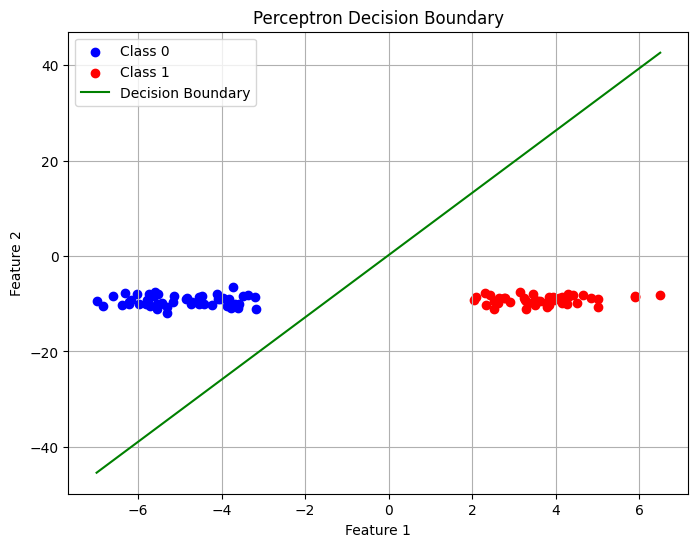

In [ ]:
import matplotlib.pyplot as plt

class_0 = X[y == -1]
class_1 = X[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')

w = perceptron_model.weights
b = perceptron_model.bias
x_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_boundary = -(w[0] * x_boundary + b) / w[1]
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')

plt.title('Perceptron Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()